<a href="https://colab.research.google.com/github/mefedraw/ASP-NET-WEB-API-app-Crates-backend/blob/main/week_01_ml_intro/Homework/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

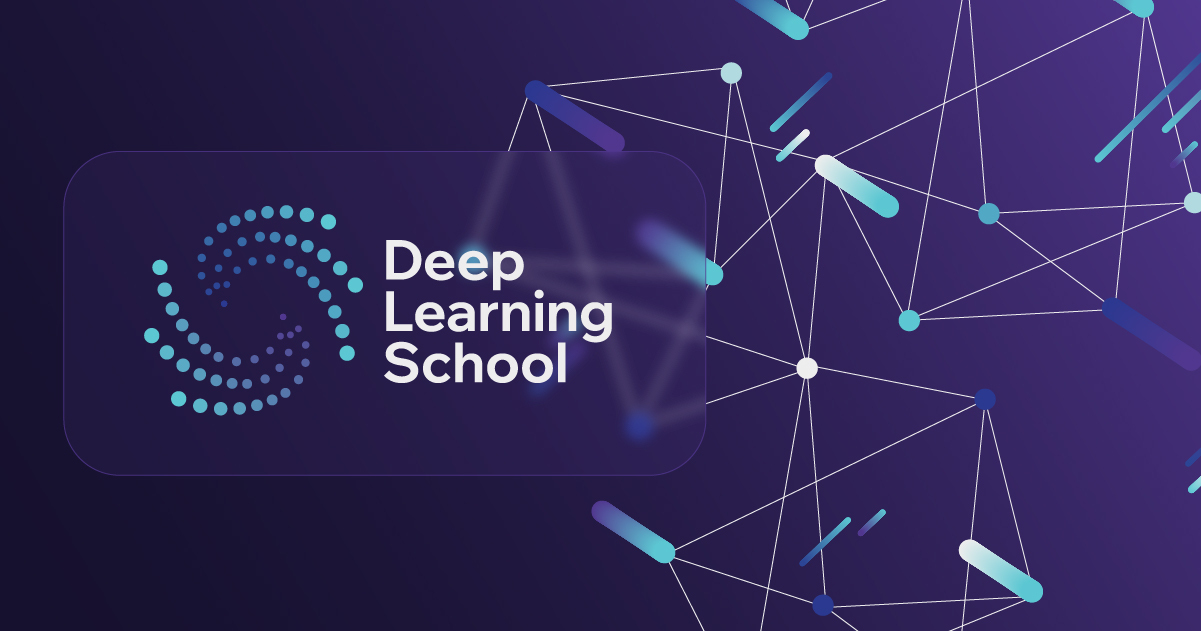

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

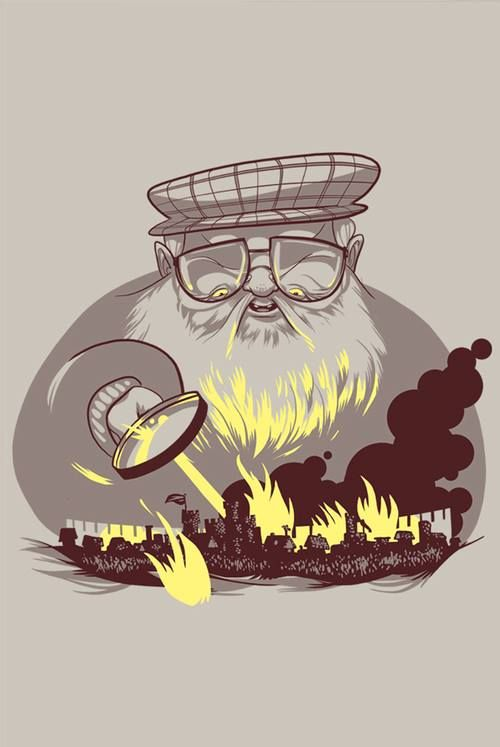

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [628]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 53.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 3.95MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [629]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [630]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')

Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)
- для удобства восприятия транспонируем таблицу

In [631]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


In [632]:
data.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [633]:
data.describe(include='number').T[['count','min','max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [634]:
desc = data.describe(include='all').T
desc['NaN count'] = data.isna().sum()
desc[['count', 'NaN count']]

,count,NaN count
name,1557,0
title,717,840
male,1557.0,0
culture,488,1069
dateOfBirth,279.0,1278
mother,18,1539
father,22,1535
heir,21,1536
house,1176,381
spouse,200,1357


В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

<Axes: xlabel='popularity', ylabel='Count'>

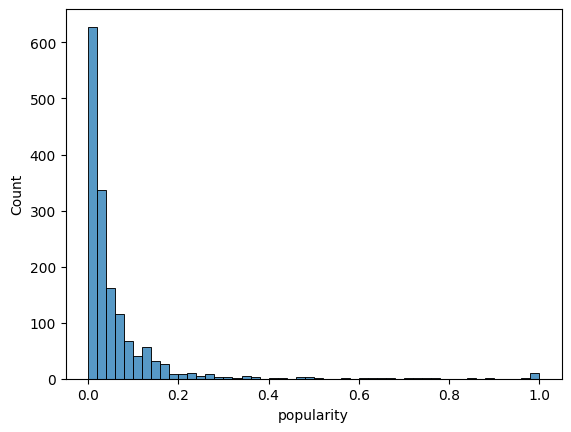

In [635]:
seaborn.histplot(data.popularity, bins=50)

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для некоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


<Axes: xlabel='normalized_popularity', ylabel='Count'>

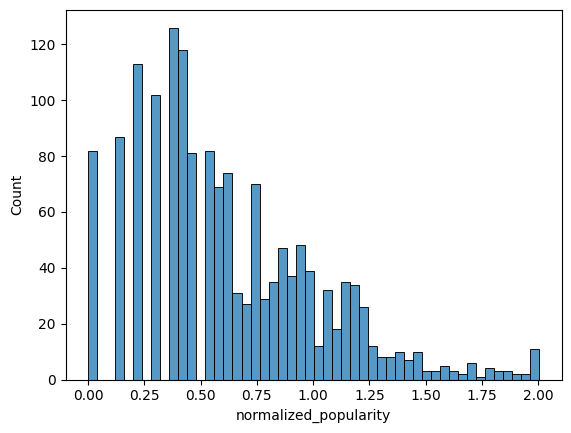

In [636]:
data["normalized_popularity"] = np.log10(data['popularity'] * 100 + 1)

seaborn.histplot(data["normalized_popularity"], bins=50)

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

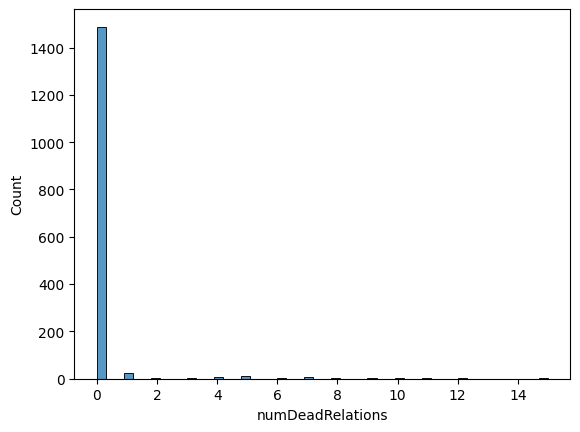

In [637]:
seaborn.histplot(data["numDeadRelations"], bins=50)
data["boolDeadRelations"] = (data["numDeadRelations"] > 0).astype(int)

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [638]:
from math import isnan
data['age_value'] = data['age'].apply(lambda x: 0 if np.isnan(x) else x)
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

data['dateOfBirth_value'] = data['dateOfBirth'].apply(lambda x: 0 if np.isnan(x) else x)
data['dateOfBirth_no_data'] = [1 if np.isnan(x) else 0 for x in data['dateOfBirth']]

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

<Axes: xlabel='count', ylabel='Count'>

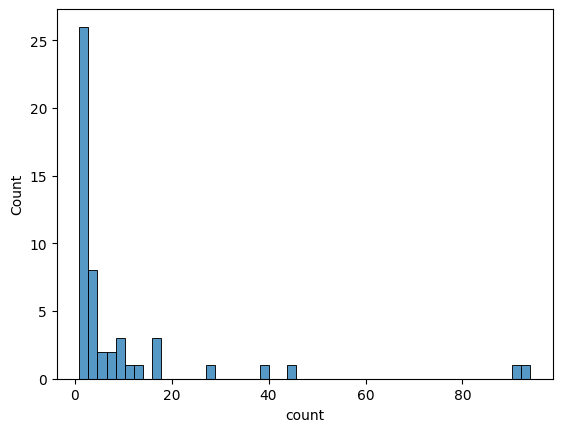

In [639]:
data['culture'].value_counts(dropna=False)
seaborn.histplot(data['culture'].value_counts(), bins=50)

Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [640]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [641]:
#Довольно просто инвертировать словарь, где ключу соответствует одно значение
#В нашем случае ключу соответствует список значений.
#Ниже показан пример, как можно инвертировать такой словарь

d = {'A': ['a1', 'a2', 'a3'],
     'B': ['b1', 'b2', 'b3', 'b4']}

d_inverted = {}
for k in d.keys():
  for v in d[k]:
      d_inverted.update({v:k})

d_inverted

{'a1': 'A', 'a2': 'A', 'a3': 'A', 'b1': 'B', 'b2': 'B', 'b3': 'B', 'b4': 'B'}

In [642]:
# По аналогии с примером выше инвертируйте словарь cultures_grouped
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
    cultures_grouped_inverted.update({v:k})

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [643]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

,culture_grouped
S.No,
1,culture_no_data
2,the Isles and Rivers
3,culture_no_data
4,culture_no_data
5,Dorne
...,...
1553,culture_no_data
1554,culture_no_data
1555,culture_no_data


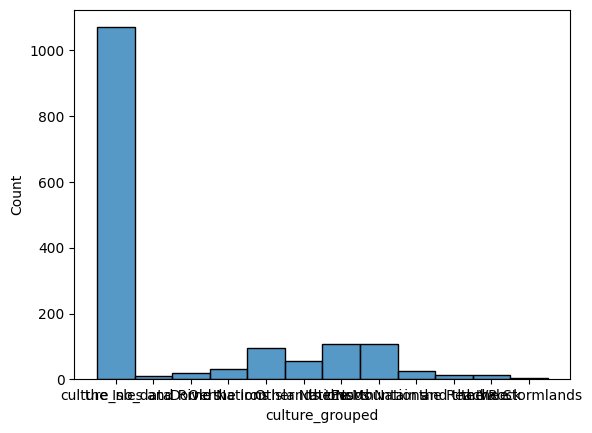

In [644]:
data['culture_grouped']  = data['culture_grouped'].apply(lambda x: 'culture_no_data' if pd.isna(x) else x)

seaborn.histplot(data['culture_grouped'], bins=50)
data['culture_grouped']

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [645]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
name,1557
title,195
male,2
culture,51
dateOfBirth,105
mother,16
father,19
heir,20
house,315
spouse,186


In [646]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = 'number').T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.000000,2
dateOfBirth,279.0,-25.0,299.000000,105
book1,1557.0,0.0,1.000000,2
book2,1557.0,0.0,1.000000,2
book3,1557.0,0.0,1.000000,2
book4,1557.0,0.0,1.000000,2
book5,1557.0,0.0,1.000000,2
isAliveMother,18.0,0.0,1.000000,2
isAliveFather,22.0,0.0,1.000000,2
isAliveHeir,21.0,0.0,1.000000,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреляцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [647]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveSpouse,,
0.0,0.619048,42
1.0,0.753165,158
NaN,0.786293,1357


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [648]:
def important_title(data, topN):
  important_titles = data.groupby('title')['title'].count().sort_values(ascending=False).head(topN)
  return important_titles

def important_house(data, topN):
  important_houses = data.groupby('house')['house'].count().sort_values(ascending=False).head(topN)
  return important_houses

important_titles, important_houses =  important_title(data, 19), important_house(data, 24)

In [649]:
def category_preprocess(data):
  data['title'] = data['title'].fillna('title_no_data')
  data['title_freq'] = data['title'].apply(lambda x: x if x in important_titles else 'rare_title')
  data["mother_known"] = data["mother"].notna().astype(int)
  data["father_known"] = data["father"].notna().astype(int)
  data["heir_known"] = data["heir"].notna().astype(int)
  data['house'] = data['house'].fillna('house_no_data')
  data['house_freq'] = data['house'].apply(lambda x: x if x in important_houses else 'rare_house')
  cols = ['isAliveMother','isAliveFather','isAliveSpouse','isAliveHeir']
  data[cols] = data[cols].fillna(False)
  # data['spouse'] = data['spouse'].fillna('spouse_no_data') - spouse не буду брать тк оч много уникальных значений и уже есть isAliveSpouse
  #print(data.describe(include = ['object']).T[['count']].assign(C_unique_values = data.nunique()), len(data.nunique()))
  data = pd.get_dummies(data, prefix='house_encoded', columns=['house_freq'])
  data = pd.get_dummies(data, prefix='title_encoded', columns=['title_freq'])
  data = pd.get_dummies(data, prefix='grouped_culture_encoded', columns=['culture_grouped'])
  return data

encoded_data = data.copy()
encoded_data = category_preprocess(encoded_data)

# encoded_data_test = data_test.copy()
# encoded_data_test = category_preprocess(encoded_data_test)
print(len(encoded_data.nunique()))

91


Проанализируйте количественные признаки. Есть ли корреляция между признаками?

isAliveMother	1539

isAliveHeir	1536

isAliveFather	1535

isAliveSpouse	1357

dateOfBirth	1278

age	1278

In [650]:
cols = data.select_dtypes(include="number").columns
corr = data[cols].corr(numeric_only=True)
corr.style\
    .format("{:.3f}")\
    .background_gradient(axis=None)\
    .set_sticky(axis="index")

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,normalized_popularity,boolDeadRelations,age_value,age_no_data,dateOfBirth_value,dateOfBirth_no_data
male,1.000,-0.053,0.051,0.024,-0.008,-0.102,0.023,nan,nan,nan,0.289,-0.094,0.134,0.140,0.028,0.113,-0.148,0.149,0.040,0.025,0.017,-0.022,0.017
dateOfBirth,-0.053,1.000,0.098,0.466,0.504,0.613,0.222,nan,nan,nan,0.236,-0.311,-0.490,-0.505,-0.129,-0.052,0.656,-0.083,-0.138,-0.505,nan,1.000,nan
book1,0.051,0.098,1.000,0.278,0.145,-0.009,0.181,nan,-0.118,nan,0.085,0.018,0.042,-0.010,0.083,0.187,-0.112,0.208,0.139,0.043,-0.060,0.070,-0.060
book2,0.024,0.466,0.278,1.000,0.381,0.102,0.136,nan,-0.118,nan,0.040,0.153,-0.033,-0.251,-0.004,0.151,-0.056,0.310,0.056,0.115,-0.241,0.288,-0.241
book3,-0.008,0.504,0.145,0.381,1.000,0.329,0.227,nan,nan,nan,0.028,0.165,0.007,-0.274,-0.026,0.141,0.018,0.335,0.033,0.087,-0.205,0.252,-0.205
book4,-0.102,0.613,-0.009,0.102,0.329,1.000,0.302,nan,nan,nan,0.149,0.141,0.047,-0.326,-0.072,0.039,0.284,0.236,-0.024,0.033,-0.145,0.202,-0.145
book5,0.023,0.222,0.181,0.136,0.227,0.302,1.000,nan,nan,nan,0.155,0.065,0.069,-0.050,0.033,0.090,0.033,0.235,0.094,0.052,-0.085,0.108,-0.085
isAliveMother,nan,nan,nan,nan,nan,nan,nan,1.000,0.316,-0.545,nan,nan,nan,nan,0.040,-0.144,0.000,-0.167,0.125,nan,nan,nan,nan
isAliveFather,nan,nan,-0.118,-0.118,nan,nan,nan,0.316,1.000,0.378,nan,nan,nan,nan,-0.258,-0.078,0.155,-0.060,-0.155,nan,nan,nan,nan
isAliveHeir,nan,nan,nan,nan,nan,nan,nan,-0.545,0.378,1.000,nan,nan,nan,nan,-0.413,0.022,0.395,-0.170,-0.158,nan,nan,nan,nan


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [651]:
print(data.columns)
target = "isAlive"
X = encoded_data.drop(columns=["name","culture","mother","father","heir","spouse","popularity",'title' ,'house','age','dateOfBirth', target])
y = encoded_data[target]

# drop: name culture mother father heir house spouse popularity isAlive

X.isna().sum().sort_values(ascending=False).head(7)

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive', 'normalized_popularity', 'boolDeadRelations', 'age_value',
       'age_no_data', 'dateOfBirth_value', 'dateOfBirth_no_data',
       'culture_grouped'],
      dtype='object')


,0
male,0
book1,0
book2,0
book3,0
book4,0
book5,0
isAliveMother,0


**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [652]:
from sklearn.model_selection import train_test_split

In [653]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков

X_train, X_val, y_train, y_val = train_test_split(X, y,train_size=0.8, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вы можете работать с одной из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [654]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [655]:
def grid_search_and_draw(X,y,model,param_name,grid):
    parametrs = {param_name: grid}

    CV_model = GridSearchCV(estimator=model,
                            param_grid = parametrs,
                            cv=5,
                            scoring='f1',
                            n_jobs=-1,
                            verbose=10)
    CV_model.fit(X,y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    best_param = CV_model.best_params_[param_name]
    plt.title(f"Model: {model.__class__.__name__} | best {param_name} is {best_param} | f1={CV_model.best_score_:.4f}")
    plt.plot(grid, means, label='mean values of score', color='red', lw=3)
    legend_box = plt.legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.xlabel('parameter')
    plt.ylabel('f1')
    plt.show()
    return means, error, CV_model.best_estimator_

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

Fitting 5 folds for each of 5 candidates, totalling 25 fits


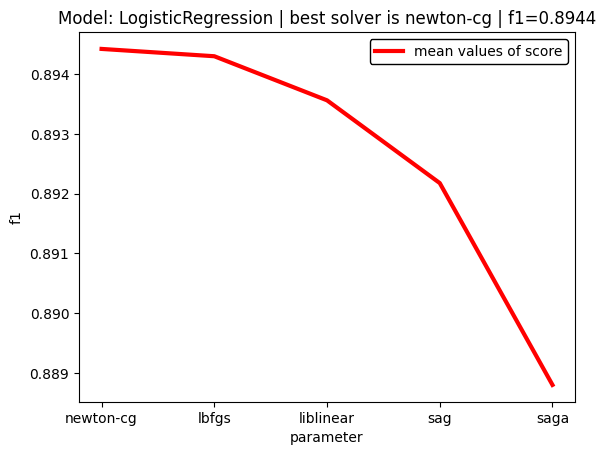

accuracy: 0.8044871794871795
roc_auc_score: 0.7869024592428848
f1_score: 0.8806262230919765


In [656]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
# Шаг 1. создание модели
LogisticRegressionModel = LogisticRegression(random_state=12345,penalty='l2')
param_name = 'solver'
grid = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# Шаг 2. обучение модели
_,_, best = grid_search_and_draw(X_train,y_train,LogisticRegressionModel, param_name, grid)

# Шаг 3. Предсказание на тестовых данных
y_pred = best.predict(X_val)
y_proba = best.predict_proba(X_val)[:, 1]

print("accuracy:", accuracy_score(y_val, y_pred))
print("roc_auc_score:", roc_auc_score(y_val, y_proba))
print("f1_score:", f1_score(y_val, y_pred))

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [657]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Fitting 5 folds for each of 4 candidates, totalling 20 fits


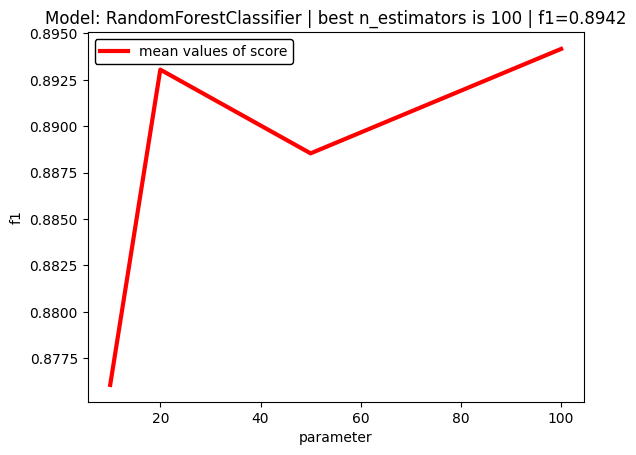

Fitting 5 folds for each of 5 candidates, totalling 25 fits


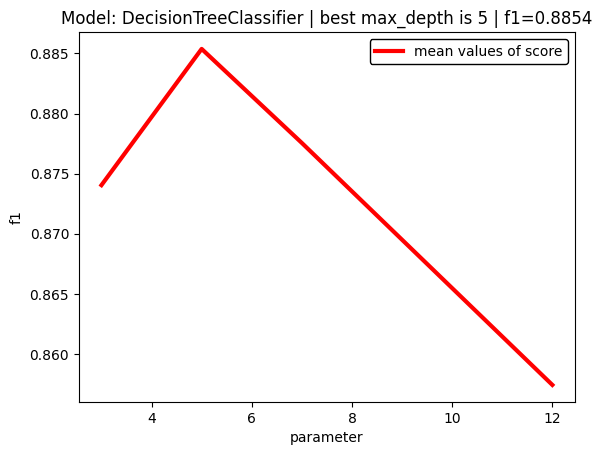

Fitting 5 folds for each of 4 candidates, totalling 20 fits


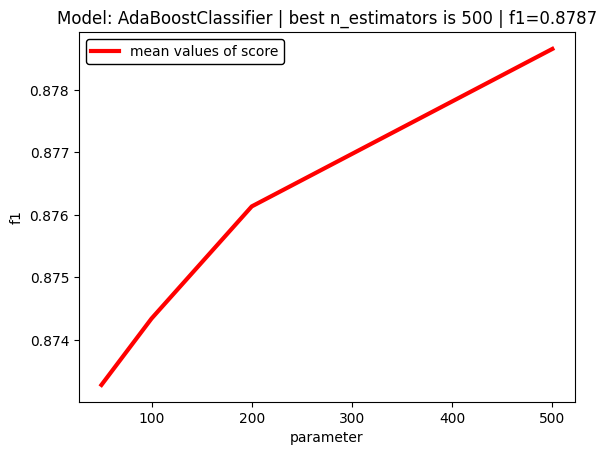

Fitting 5 folds for each of 6 candidates, totalling 30 fits


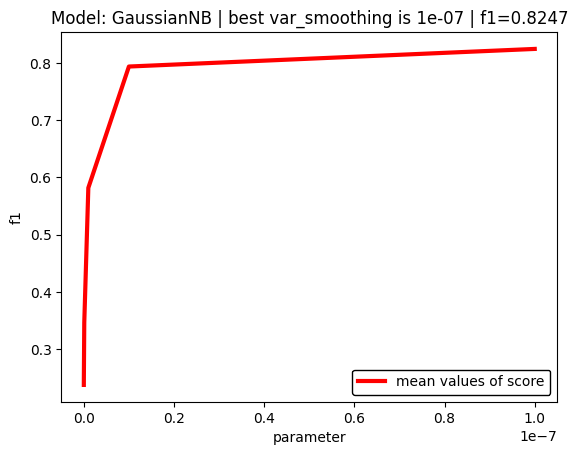

Fitting 5 folds for each of 30 candidates, totalling 150 fits


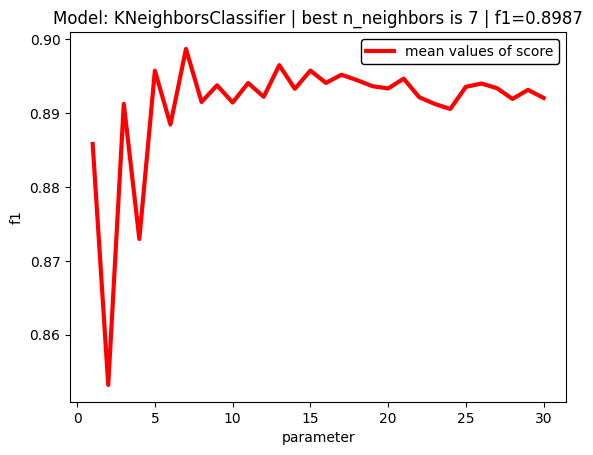

Fitting 5 folds for each of 7 candidates, totalling 35 fits


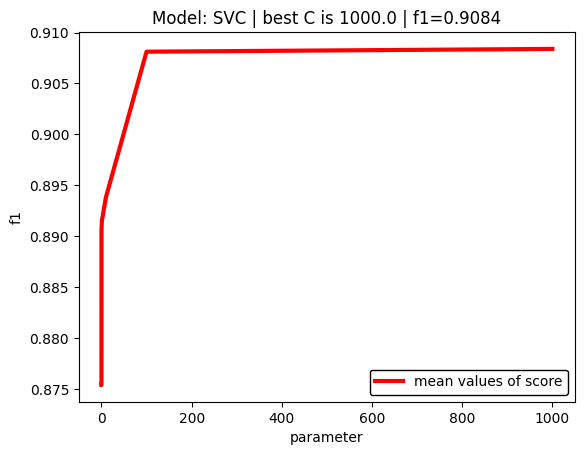

In [658]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Шаг 3. Предсказание на тестовых данных
# Шаг 4. Оценка предсказания по метрике accuracy - выше привел метрики

models = [RandomForestClassifier(),DecisionTreeClassifier(),AdaBoostClassifier(), GaussianNB(),KNeighborsClassifier(),SVC()]

param_names = [
    "n_estimators",
    "max_depth",
    "n_estimators",
    "var_smoothing",
    "n_neighbors",
    "C"
]

grids = [
    [10, 20, 50,100,],
    [None, 3, 5, 7, 12],
    [50, 100, 200, 500],
    np.logspace(-12, -7, 6),
    np.arange(1, 31),
    np.logspace(-3, 3, 7)
]

best_models = {}
for model, param_name, grid in zip(models,param_names,grids):
  _, _, best = grid_search_and_draw(X,y,model,param_name,grid)
  best_models[str(best.__class__.__name__)] = best


In [659]:
best_models

{'RandomForestClassifier': RandomForestClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5),
 'AdaBoostClassifier': AdaBoostClassifier(n_estimators=500),
 'GaussianNB': GaussianNB(var_smoothing=np.float64(1e-07)),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=np.int64(7)),
 'SVC': SVC(C=np.float64(1000.0))}

In [660]:

for model_name, best_example in best_models.items():
  y_pred = best_example.predict(X_val)
  print(f"Current model is {model_name} | Val Accuracy: {accuracy_score(y_val,y_pred):.4f}")

best_metrics_model = best_models['RandomForestClassifier']

Current model is RandomForestClassifier | Val Accuracy: 0.9744
Current model is DecisionTreeClassifier | Val Accuracy: 0.8333
Current model is AdaBoostClassifier | Val Accuracy: 0.8301
Current model is GaussianNB | Val Accuracy: 0.7564
Current model is KNeighborsClassifier | Val Accuracy: 0.8558
Current model is SVC | Val Accuracy: 0.8205


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [661]:
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [662]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


In [663]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278
data_test.loc[1685, 'age'] = 0
data_test.loc[1869, 'dateOfBirth'] = 299
data_test.loc[1869, 'age'] = 0
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

data_test["normalized_popularity"] = np.log10(data_test['popularity'] * 100 + 1)
data_test["boolDeadRelations"] = (data_test["numDeadRelations"] > 0).astype(int)
data_test['age_value'] = data_test['age'].apply(lambda x: 0 if np.isnan(x) else x)
data_test['age_no_data'] = [1 if np.isnan(x) else 0 for x in data_test['age']]
data_test['dateOfBirth_value'] = data_test['dateOfBirth'].apply(lambda x: 0 if np.isnan(x) else x)
data_test['dateOfBirth_no_data'] = [1 if np.isnan(x) else 0 for x in data_test['dateOfBirth']]
data_test['culture_grouped'] = data_test['culture'].str.lower().map(cultures_grouped_inverted)
data_test['culture_grouped']  = data_test['culture_grouped'].apply(lambda x: 'culture_no_data' if pd.isna(x) else x)

data_test_encoded = data_test.copy()
data_test_encoded = category_preprocess(data_test_encoded)
data_test_encoded = data_test_encoded.reindex(columns=encoded_data.columns, fill_value=0)

X_test = data_test_encoded.drop(columns=["name","culture","mother","father","heir","spouse","popularity",'title' ,'house','age','dateOfBirth'])
X_test = X_test.drop(columns=[target], errors="ignore")

# предсказания модели
y_test_pred = best_metrics_model.predict(X_test)


Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [664]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.20MB/s]


In [665]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')
submission['isAlive'] = y_test_pred

In [666]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,0
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [667]:
submission.to_csv("/content/new_submission.csv", index=False)